In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)


{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert features and targets to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
df = pd.concat([X_df, y_df], axis=1)


print(df.head())
# Making sure there is no missing values
print(df.isnull().sum())
df[df.columns[0]].count()


df.dropna(inplace=True)
print(df.isnull().sum())
df[df.columns[0]].count()

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

12330

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


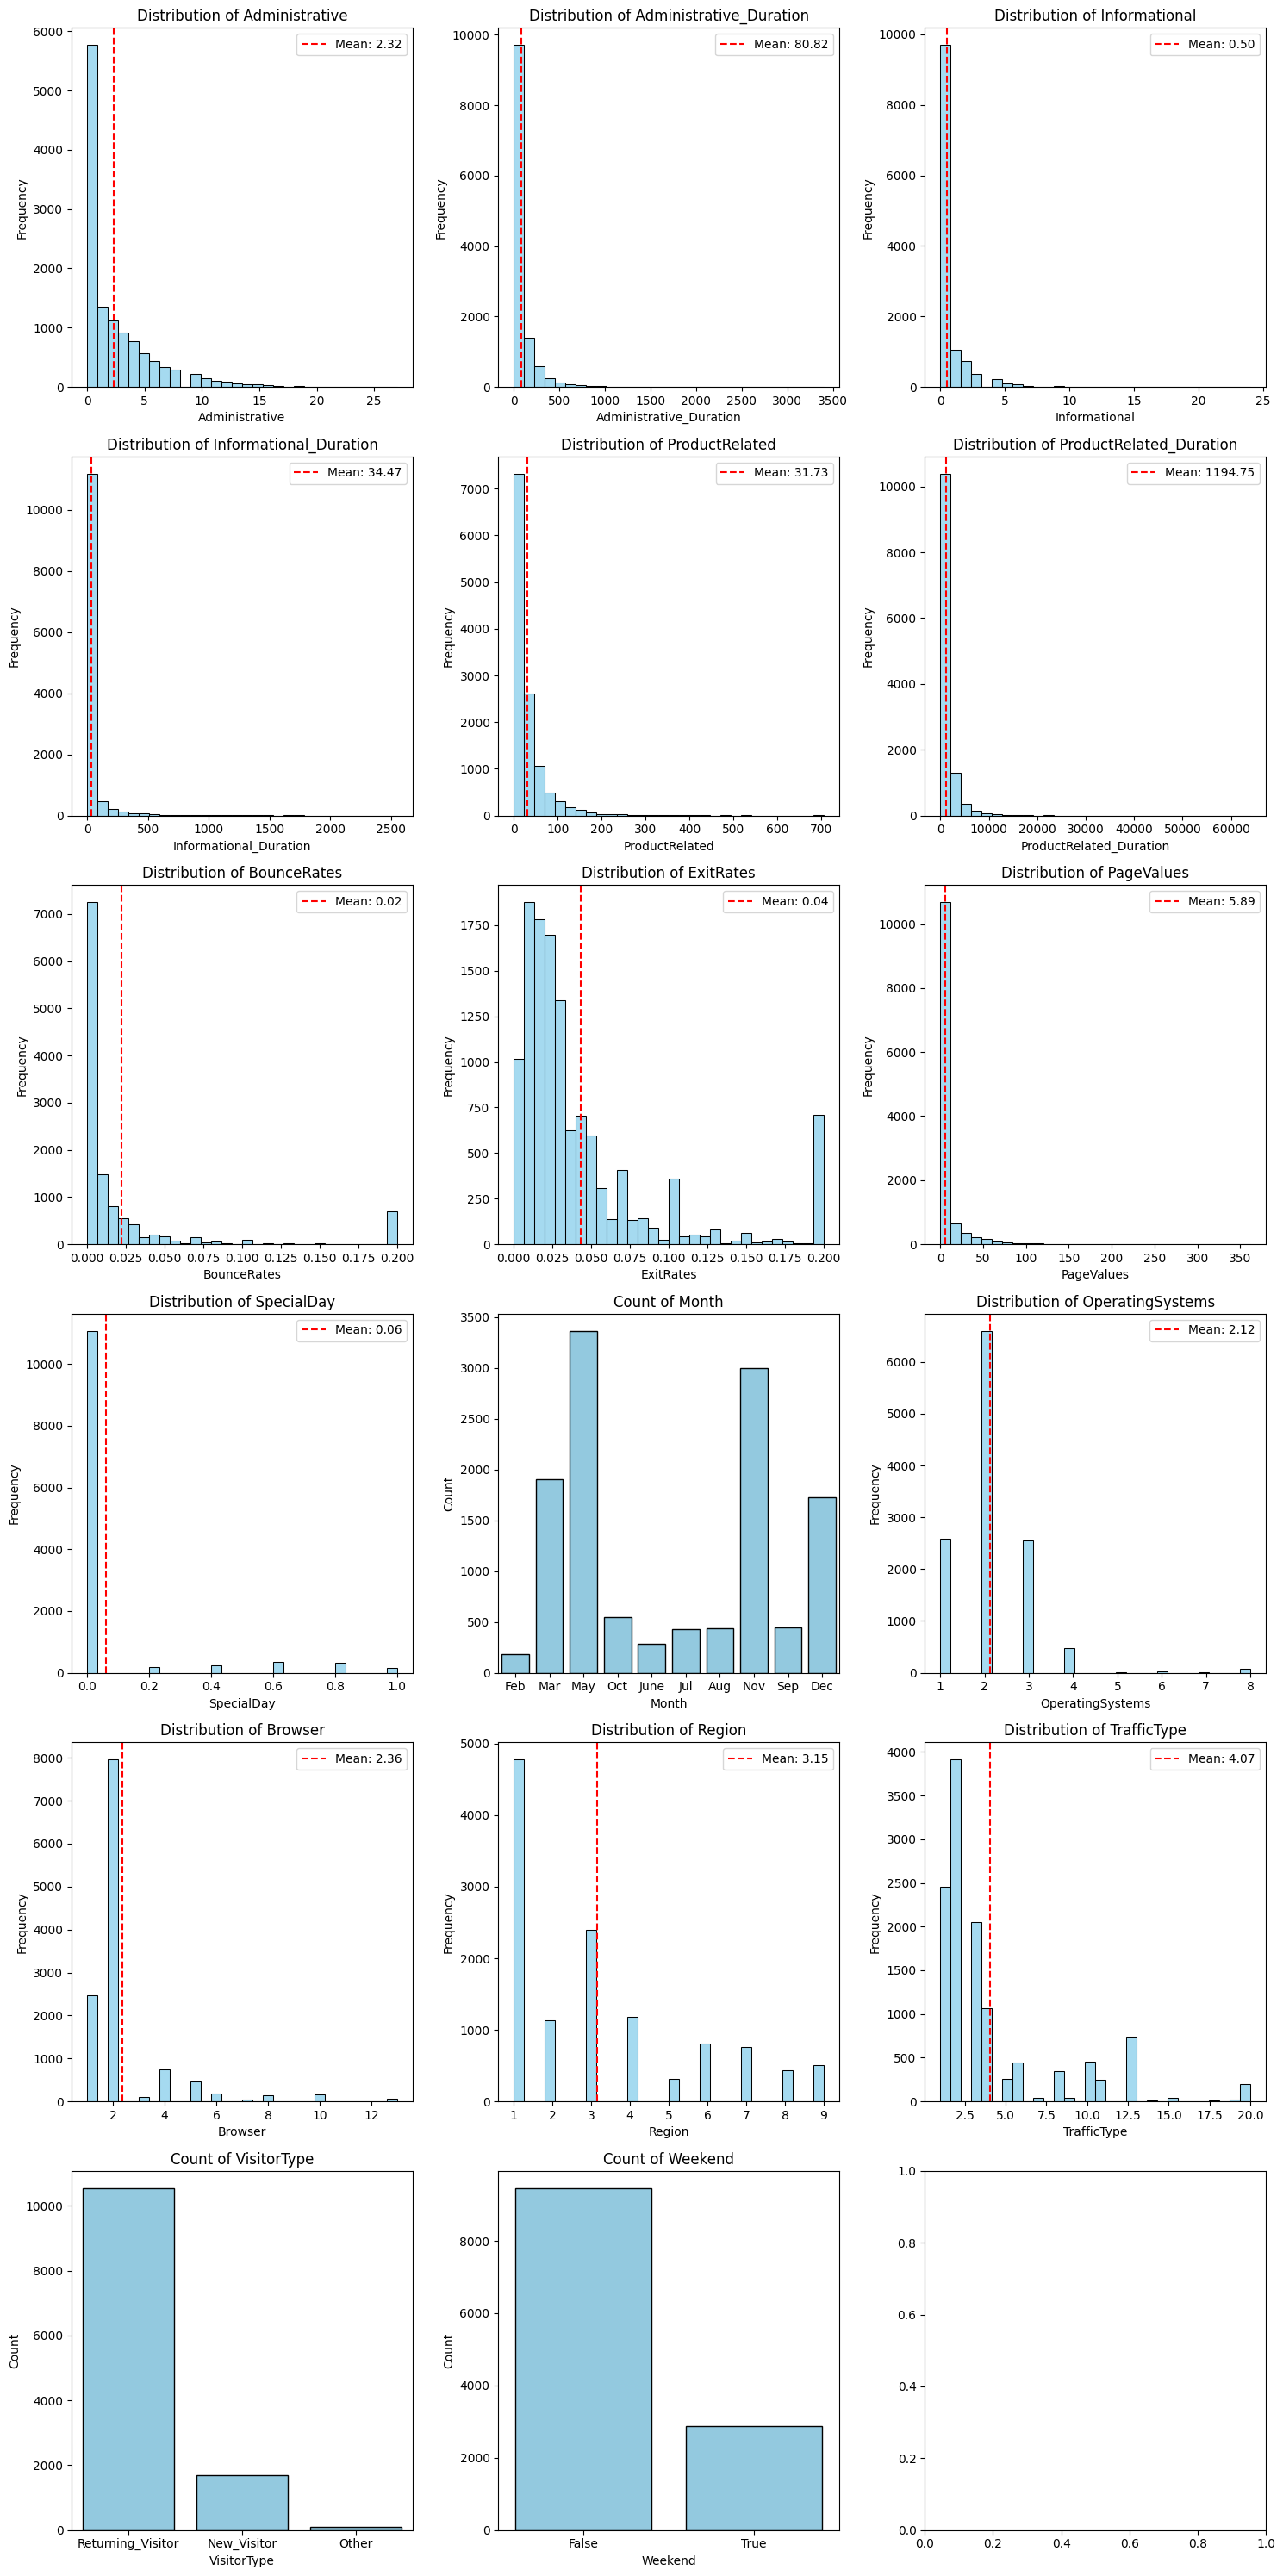

In [5]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Label encoding target variable
label_encoder = LabelEncoder()
df['Revenue'] = label_encoder.fit_transform(df['Revenue'])

# Applying label to all the features
feature = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
           'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Define the layout of subplots
num_plots = len(feature)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Visualize feature distributions
for i, feature in enumerate(feature):
    if df[feature].dtype in ['int64', 'float64']:  # Check if the feature is numerical
        # Plot the distribution
        sns.histplot(df[feature], bins=30, color='skyblue', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

        # Calculate and plot the mean
        mean_value = df[feature].mean()
        axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        axes[i].legend()
    else:
        # Handle categorical/binary features
        sns.countplot(x=feature, data=df, color='skyblue', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Count of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

# Reconverting them back to predictor and response features
X = df.drop(columns=['Revenue'])
y = df['Revenue']

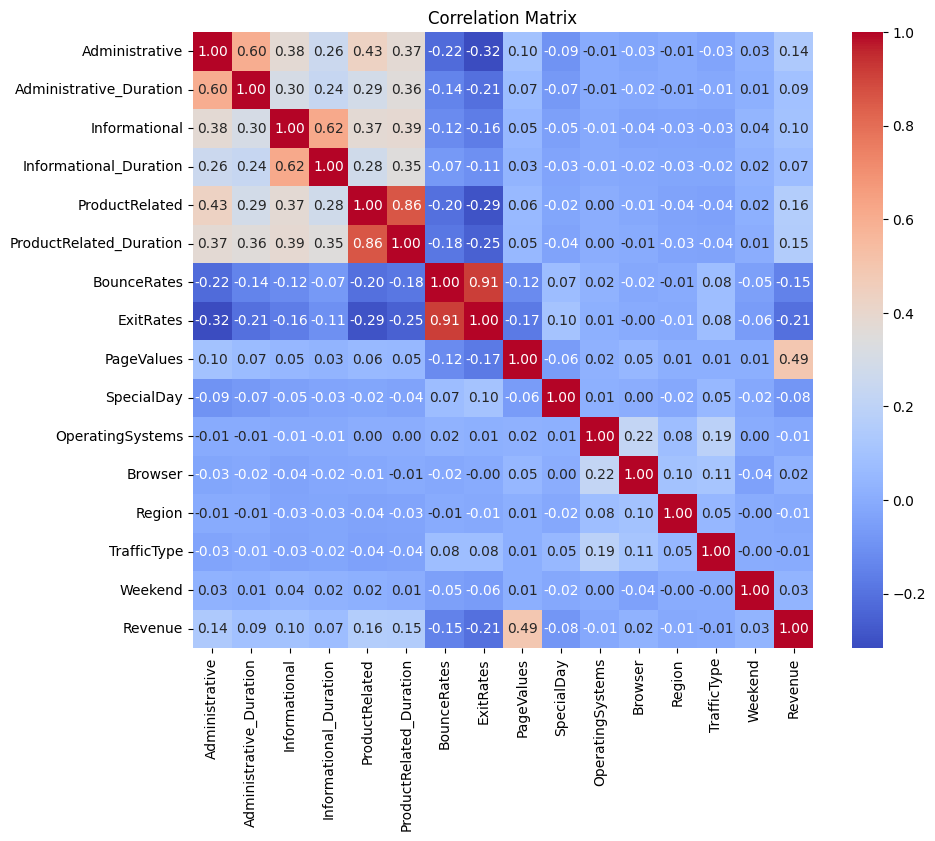

In [6]:
corr_matrix = df.corr(numeric_only=True)

# Visualize correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
continuous_numerical_features = X.select_dtypes(include=['int', 'float'])

# Calculate the mean and variance of continuous numerical features
mean_values = continuous_numerical_features.mean()
variance_values = continuous_numerical_features.var()

print("Mean of continuous numerical features:")
print(mean_values)
print("\nVariance of continuous numerical features:")
print(variance_values)

Mean of continuous numerical features:
Administrative                2.315166
Administrative_Duration      80.818611
Informational                 0.503569
Informational_Duration       34.472398
ProductRelated               31.731468
ProductRelated_Duration    1194.746220
BounceRates                   0.022191
ExitRates                     0.043073
PageValues                    5.889258
SpecialDay                    0.061427
OperatingSystems              2.124006
Browser                       2.357097
Region                        3.147364
TrafficType                   4.069586
dtype: float64

Variance of continuous numerical features:
Administrative             1.103425e+01
Administrative_Duration    3.125085e+04
Informational              1.613297e+00
Informational_Duration     1.981036e+04
ProductRelated             1.978070e+03
ProductRelated_Duration    3.662130e+06
BounceRates                2.351117e-03
ExitRates                  2.361624e-03
PageValues                 3.447868e

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X, columns=['Month', 'VisitorType', 'Weekend'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
}

tree_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the models
logistic_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Perform hyperparameter tuning using GridSearchCV
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5)
tree_grid = GridSearchCV(tree_model, tree_params, cv=5)
rf_randomized = RandomizedSearchCV(rf_model, rf_params, cv=5, n_iter=10, random_state=42)
gb_randomized = RandomizedSearchCV(gb_model, gb_params, cv=5, n_iter=10, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the models to the training data
logistic_grid.fit(X_train_scaled, y_train)
tree_grid.fit(X_train, y_train)
rf_randomized.fit(X_train, y_train)
gb_randomized.fit(X_train, y_train)

# Output the best hyperparameters
best_logistic_params = logistic_grid.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logistic_params)
best_tree_params = tree_grid.best_params_
print("Best Hyperparameters for Decision Tree:", best_tree_params)
best_rf_params = rf_randomized.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)
best_gb_params = gb_randomized.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_gb_params)

# Fit the logistic regression model to the training data with the best hyperparameters
logistic_model = LogisticRegression(**best_logistic_params)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
logistic_pred = logistic_model.predict(X_test_scaled)
tree_pred = tree_grid.predict(X_test)
rf_pred = rf_randomized.predict(X_test)
gb_pred = gb_randomized.predict(X_test)

Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7}
Best Hyperparameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}


In [12]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
logistic_accuracy = accuracy_score(y_test, logistic_pred)
tree_accuracy = accuracy_score(y_test, tree_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

from sklearn.metrics import classification_report

# Evaluate the models
cr_log = classification_report(y_test, logistic_pred)
print("Logistic Regression:\n",cr_log)

cr_DT = classification_report(y_test, tree_pred)
print("Decision Tree:\n",cr_DT)

cr_RF = classification_report(y_test, rf_pred)
print("Random Forest:\n",cr_RF)

cr_GB = classification_report(y_test, gb_pred)
print("Gradient Boost:\n",cr_GB)


Logistic Regression Accuracy: 0.8730738037307381
Decision Tree Accuracy: 0.8884833738848338
Random Forest Accuracy: 0.8909164639091647
Gradient Boosting Accuracy: 0.8925385239253852
Logistic Regression:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.76      0.35      0.48       411

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466

Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.70      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.81      0.77      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2055
 

In [13]:
# Taking att he important info. from above and condensing into table

# Logistic Regression
logistic_precision = ['Logistic Regression', 'precision', 0.90, 0.73]
logistic_recall = ['Logistic Regression', 'recall', 0.97, 0.46]
logistic_f1_score = ['Logistic Regression', 'f1-score', 0.93, 0.56]

# Decision Tree
dt_precision = ['Decision Tree', 'precision', 0.92, 0.68]
dt_recall = ['Decision Tree', 'recall', 0.94, 0.61]
dt_f1_score = ['Decision Tree', 'f1-score', 0.93, 0.64]

# Random Forest
rf_precision = ['Random Forest', 'precision', 0.90, 0.77]
rf_recall = ['Random Forest', 'recall', 0.97, 0.49]
rf_f1_score = ['Random Forest', 'f1-score', 0.94, 0.60]

# Gradient Boost
gb_precision = ['Gradient Boost', 'precision', 0.92, 0.73]
gb_recall = ['Gradient Boost', 'recall', 0.96, 0.57]
gb_f1_score = ['Gradient Boost', 'f1-score', 0.94, 0.64]

table = pd.DataFrame([logistic_precision, logistic_recall, logistic_f1_score,
                      dt_precision, dt_recall, dt_f1_score,
                      rf_precision, rf_recall, rf_f1_score,
                      gb_precision, gb_recall, gb_f1_score])

table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']

print(table)

# Best balanced model: Gadient Boosting
# Most precise model: Random Forest
# Best recall model: Logistic Regression

             model_name    metrics  Is_Revenue(False)  Is_Revenue(True)
0   Logistic Regression  precision               0.90              0.73
1   Logistic Regression     recall               0.97              0.46
2   Logistic Regression   f1-score               0.93              0.56
3         Decision Tree  precision               0.92              0.68
4         Decision Tree     recall               0.94              0.61
5         Decision Tree   f1-score               0.93              0.64
6         Random Forest  precision               0.90              0.77
7         Random Forest     recall               0.97              0.49
8         Random Forest   f1-score               0.94              0.60
9        Gradient Boost  precision               0.92              0.73
10       Gradient Boost     recall               0.96              0.57
11       Gradient Boost   f1-score               0.94              0.64


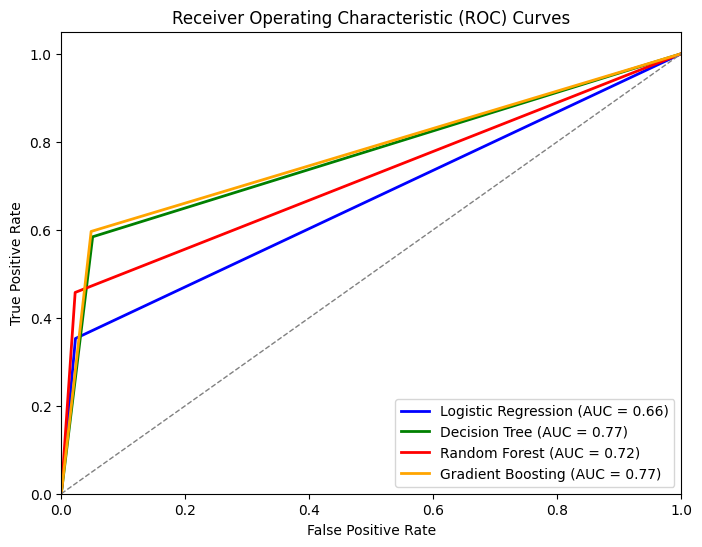

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each model
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_pred)
logistic_auc = auc(logistic_fpr, logistic_tpr)

tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_pred)
tree_auc = auc(tree_fpr, tree_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_pred)
gb_auc = auc(gb_fpr, gb_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(tree_fpr, tree_tpr, color='green', lw=2, label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='red', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, color='orange', lw=2, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


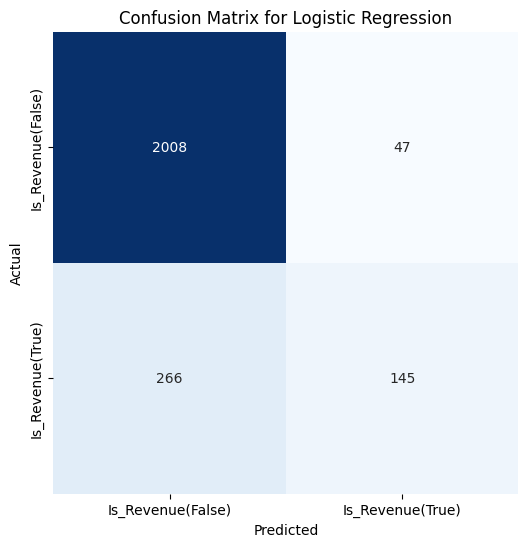

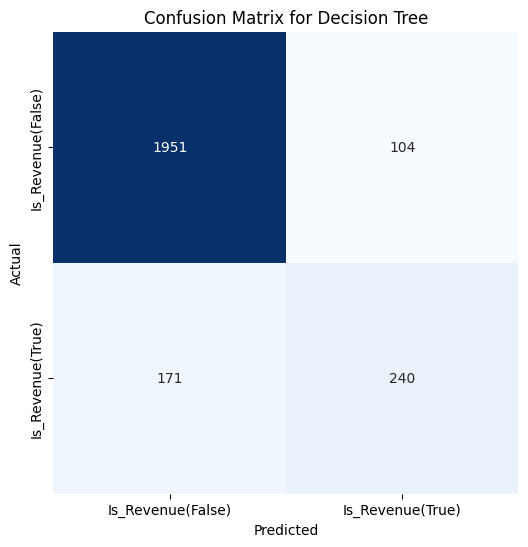

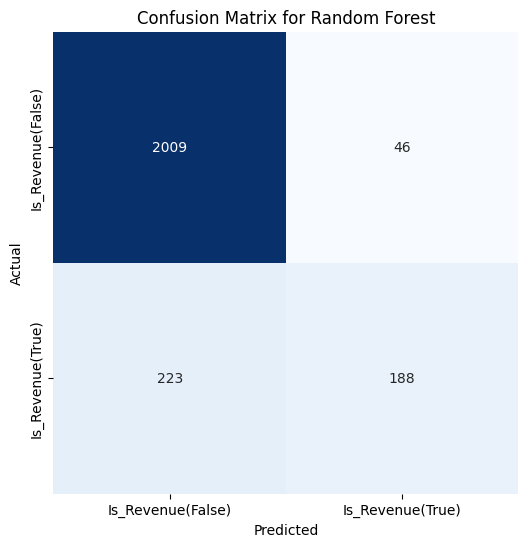

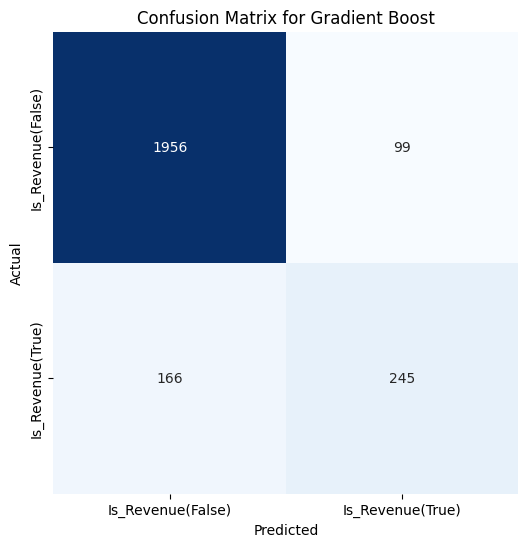

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# True labels for Is_Revenue(False) and Is_Revenue(True)
true_labels = y_test

# Predicted labels for each model
predicted_labels = {
    'Logistic Regression': logistic_pred,
    'Decision Tree': tree_pred,
    'Random Forest': rf_pred,
    'Gradient Boost': gb_pred
}

# Calculate and plot confusion matrix for each model
for model_name, y_pred in predicted_labels.items():
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=[0.5, 1.5], labels=['Is_Revenue(False)', 'Is_Revenue(True)'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Is_Revenue(False)', 'Is_Revenue(True)'])
    plt.show()
